In [18]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import (mean_absolute_error, mean_squared_error, r2_score, accuracy_score, confusion_matrix)
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Charger les données
train = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\data\\cleaned data\\finaltrain.csv")
test = pd.read_csv("C:\\Users\\Dell\\house-price-prediction\\data\\cleaned data\\finaltest.csv")


=== Métriques d'évaluation ===
MAE: 32957.75
MSE: 2356783953.16
RMSE: 48546.72
R² Score: 0.69


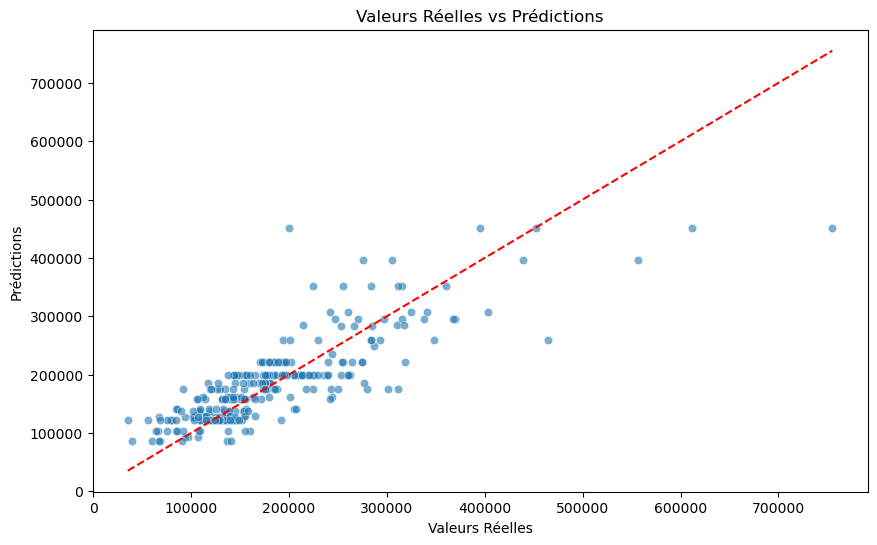

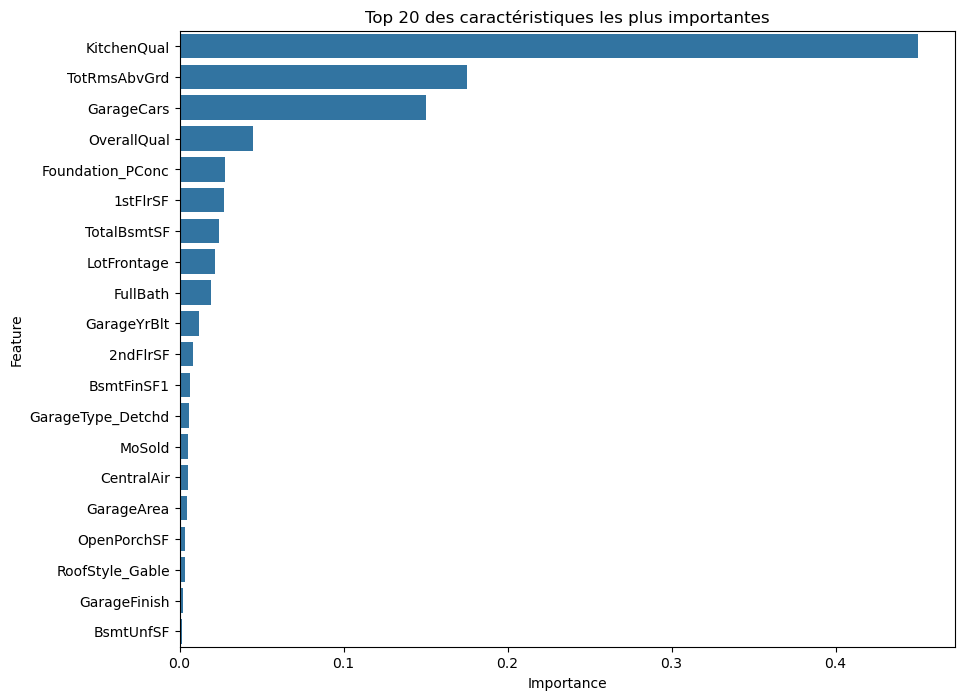

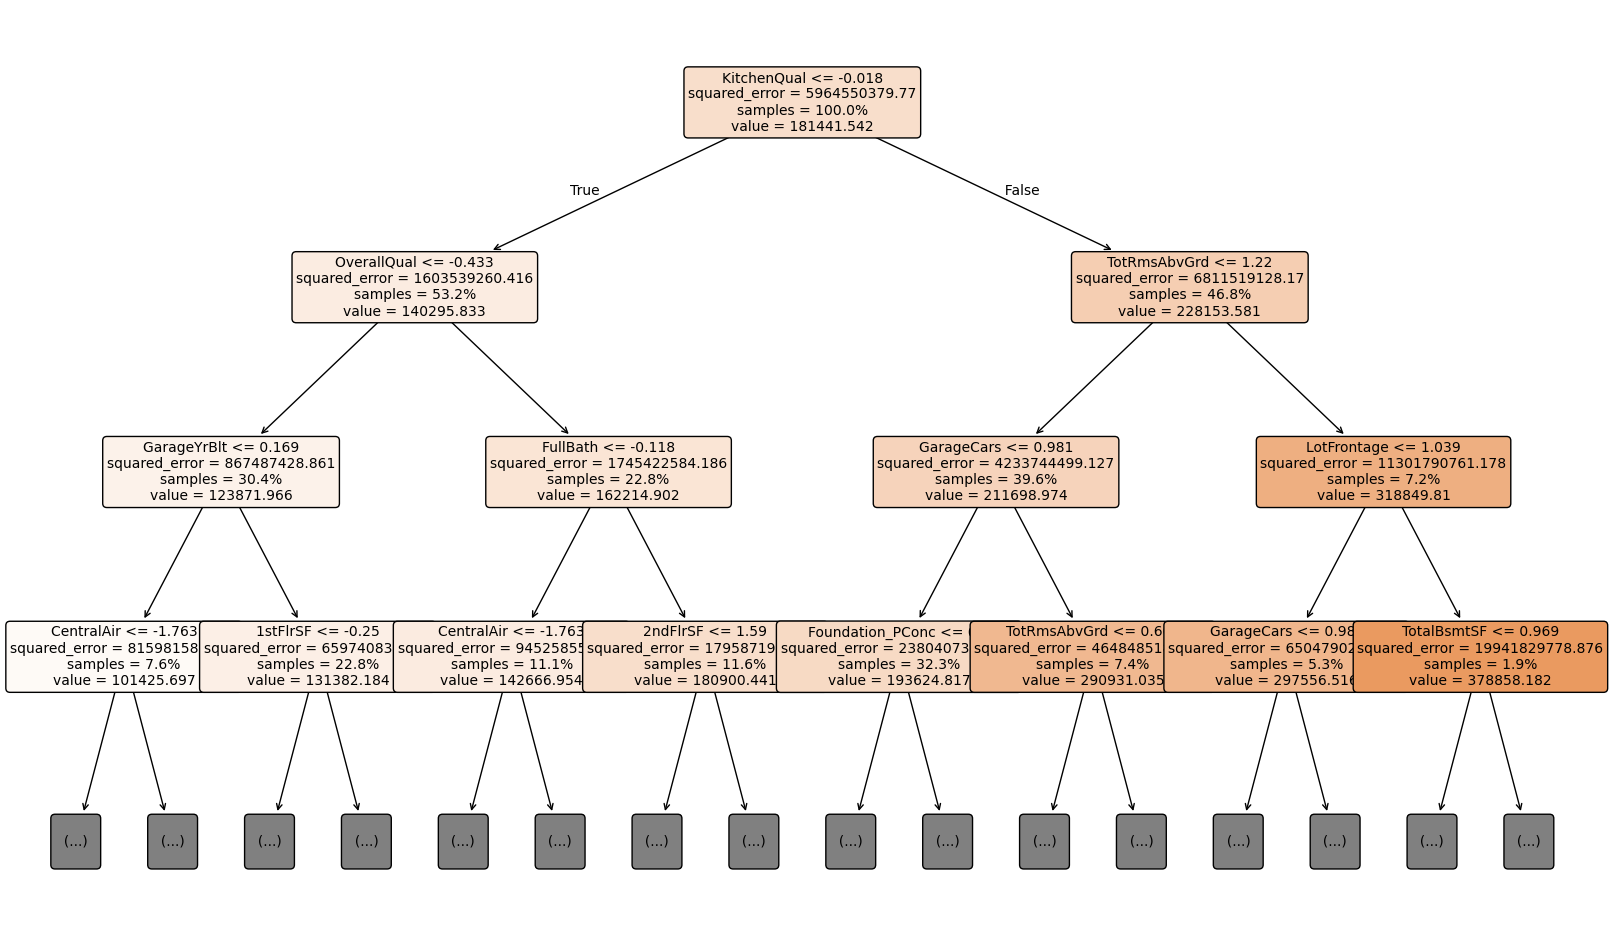


=== Scores de validation croisée ===
MAE moyen: 32033.41 (+/- 1991.16)

Modèle sauvegardé sous 'modele_arbre_decision.pkl'


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

# 1. Chargement des données (à remplacer par votre chargement)
# train = pd.read_csv('chemin/vers/vos/données.csv')

# 2. Préparation des données
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Construction et entraînement du modèle de base
dt_model = DecisionTreeRegressor(
    random_state=42,
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    max_features='sqrt'
)
dt_model.fit(X_train, y_train)

# 4. Fonction d'évaluation améliorée
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    print("\n=== Métriques d'évaluation ===")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
    print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
    
    # Visualisation
    plt.figure(figsize=(10,6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Valeurs Réelles')
    plt.ylabel('Prédictions')
    plt.title('Valeurs Réelles vs Prédictions')
    plt.show()
    
    return y_pred

# Appel de la fonction d'évaluation
y_pred = evaluate_model(dt_model, X_test, y_test)

# 5. Analyse d'importance des caractéristiques
def plot_feature_importance(model, features, top_n=20):
    importance = pd.DataFrame({
        'Feature': features,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=importance.head(top_n))
    plt.title(f'Top {top_n} des caractéristiques les plus importantes')
    plt.show()
    
    return importance

feature_importance = plot_feature_importance(dt_model, X.columns)

# 6. Optimisation des hyperparamètres (optionnel)
def optimize_tree(X_train, y_train):
    param_grid = {
        'max_depth': [3, 5, 7, 9, None],
        'min_samples_split': [2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10],
        'max_features': ['auto', 'sqrt', 'log2']
    }
    
    grid_search = GridSearchCV(
        DecisionTreeRegressor(random_state=42),
        param_grid,
        cv=5,
        scoring='neg_mean_absolute_error',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    print("\n=== Meilleurs paramètres ===")
    print(grid_search.best_params_)
    
    return grid_search.best_estimator_

# Décommentez pour exécuter l'optimisation
# best_model = optimize_tree(X_train, y_train)
# y_pred_best = evaluate_model(best_model, X_test, y_test)

# 7. Visualisation de l'arbre
def plot_decision_tree(model, features):
    plt.figure(figsize=(20, 12))
    plot_tree(
        model,
        feature_names=features,
        filled=True,
        rounded=True,
        proportion=True,
        max_depth=3,
        fontsize=10
    )
    plt.show()

plot_decision_tree(dt_model, X.columns)

# 8. Validation croisée
def cross_validate_model(model, X, y):
    scores = cross_val_score(
        model, X, y,
        cv=5,
        scoring='neg_mean_absolute_error'
    )
    print("\n=== Scores de validation croisée ===")
    print(f"MAE moyen: {-scores.mean():.2f} (+/- {scores.std():.2f})")

cross_validate_model(dt_model, X, y)

# 9. Sauvegarde du modèle
joblib.dump(dt_model, 'modele_arbre_decision.pkl')
print("\nModèle sauvegardé sous 'modele_arbre_decision.pkl'")

# Pour charger le modèle plus tard:
# dt_model_loaded = joblib.load('modele_arbre_decision.pkl')